Чтобы продемонстрировать корреляцию между второй и третьей главными компонентами, сначала сгенерируем синтетические данные с коррелированными признаками, затем выполним PCA и визуализируем результаты.

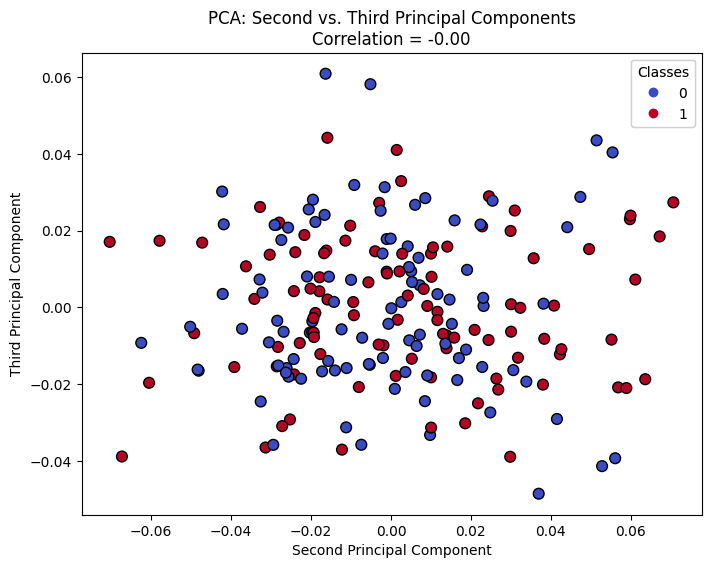

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Создаем синтетические данные с коррелированными признаками
n_samples = 200
n_features = 3
random_state = 42
X, y = make_blobs(n_samples=n_samples, n_features=n_features, random_state=random_state, centers=2)

# Добавляем корреляцию между признаками
correlation_matrix = np.array([[1, 0.8, 0.8],
                               [0.8, 1, 0.8],
                               [0.8, 0.8, 1]])
X_corr = X @ correlation_matrix

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corr)

# Выполняем PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Вычисляем корреляцию между второй и третьей главными компонентами
correlation = np.corrcoef(X_pca[:, 1], X_pca[:, 2])[0, 1]

# Визуализация
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X_pca[:, 1], X_pca[:, 2], c=y, cmap="coolwarm", edgecolor="k", s=60)

# Добавляем легенду
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Устанавливаем подписи осей и заголовок
ax.set_xlabel("Second Principal Component")
ax.set_ylabel("Third Principal Component")
ax.set_title(f"PCA: Second vs. Third Principal Components\nCorrelation = {correlation:.2f}")

# Отображаем график
plt.show()


Корреляция между второй и третьей главными компонентами равна

(Вопрос со звездочкой! Поэкспериментируйте в ноутбуке): **Нулю, так как следующая главная компонента выбирается ортогональной всем предыдущим.**